## Build a linear regression model for the dataset ‘electric_motor.csv’. Comment on the results

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import random as rnd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [12]:
df = pd.read_csv('electric_motor.csv')

In [13]:
df.head()


,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


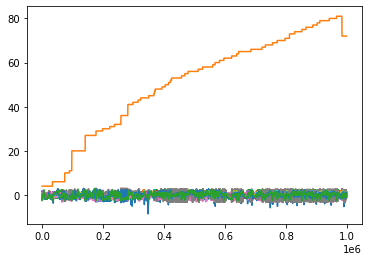

In [14]:
x=df.drop(['pm'],axis=1)
y=df['pm']
plt.plot(x)
plt.plot(y)

In [25]:
features = list(set(df.columns)-set(['motor_speed','torque']))
target = list(['motor_speed','torque'])
print(features)
print(target)
['stator_winding', 'coolant', 'i_d', 'stator_tooth', 'profile_id', 
'u_q', 'pm', 'i_q', 'stator_yoke', 'ambient', 'u_d']
['motor_speed', 'torque']
x = df.loc[:,features]
y = df.loc[:,target].astype(float)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
base_pre = np.mean(y_test)
print(base_pre)


['u_d', 'i_d', 'u_q', 'i_q', 'stator_tooth', 'pm', 'profile_id', 'stator_winding', 'ambient', 'coolant', 'stator_yoke']
['motor_speed', 'torque']
motor_speed   -0.004353
torque        -0.002432
dtype: float64


C:\Users\91830\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [26]:
base_pred=np.repeat(base_pre,len(y_test))
print(base_pred)


motor_speed   -0.004353
motor_speed   -0.004353
motor_speed   -0.004353
motor_speed   -0.004353
motor_speed   -0.004353
                 ...   
torque        -0.002432
torque        -0.002432
torque        -0.002432
torque        -0.002432
torque        -0.002432
Length: 598842, dtype: float64


In [28]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(X_train)
scaler_y.fit(y_train)
StandardScaler()

StandardScaler()

StandardScaler()

In [29]:
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)
y_train = scaler_y.transform(y_train)
lgr = LinearRegression()
x = lgr.fit(X_train,y_train)
x.coef_


array([[-1.40928576e-01, -6.49349286e-01,  5.44484775e-01,
        -1.82485257e-01,  2.35671433e+00,  1.05744816e-01,
        -6.58846943e-03, -1.19271009e+00, -4.74054145e-02,
         4.15341210e-01, -1.64771362e+00],
       [-6.90117641e-02, -2.07371914e-02, -1.40309814e-02,
         9.33570254e-01, -1.40551227e-01, -9.81994903e-04,
         6.29896607e-03,  9.16799465e-02, -3.37402447e-03,
        -5.32939335e-03,  6.09187751e-02]])

In [20]:
x = lgr.fit(X_train,y_train)
x.coef_


array([[-1.40928576e-01, -6.49349286e-01,  5.44484775e-01,
        -1.82485257e-01,  2.35671433e+00,  1.05744816e-01,
        -6.58846943e-03, -1.19271009e+00, -4.74054145e-02,
         4.15341210e-01, -1.64771362e+00],
       [-6.90117641e-02, -2.07371914e-02, -1.40309814e-02,
         9.33570254e-01, -1.40551227e-01, -9.81994903e-04,
         6.29896607e-03,  9.16799465e-02, -3.37402447e-03,
        -5.32939335e-03,  6.09187751e-02]])

In [21]:
pred_lgr=lgr.predict(X_test)
y_predicted = scaler_y.inverse_transform(pred_lgr)
print(y_predicted)


[[-1.28894016 -0.26057314]
 [-0.33144692  0.44213959]
 [ 0.19480701 -1.64476966]
 ...
 [-1.35051682 -0.25777813]
 [-0.75026849 -0.6144407 ]
 [-1.20097625 -0.25455705]]


0.19576637587840987


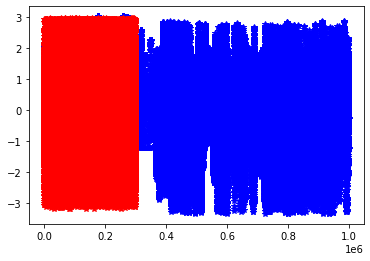

In [22]:
mean_squared_error = (mean_squared_error(y_test,y_predicted))**0.5
print(mean_squared_error)
0.1956759451110211
plt.plot(y_test,'b*')
plt.plot(y_predicted,'r*')
